# RNN

1.handle sequence data

2.variable sized input-->variable sized output(has a sequence nature to it)

3.sequential nature of data:

    3.1)sequence of entities defined the data
    3.2)every sequence has different meaning
    3.3)size of input sequence can effect the output

4.Recurrent neural networks are used for :

    4.1)handwriting recognition
    4.2)speech recognition
    4.3)machine translation
    4.4)image captioning and word prediction
    4.5)music generation

5.In the recurrent neural network 3 different weight matrix sets are used:

    5.1)Way
    5.2)Waa
    5.3)Wxa

In [1]:
from pandas import read_csv 
import numpy as np

In [11]:
df = read_csv('international-airline-passengers.csv', usecols=[1])
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [8]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [3]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [4]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [6]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0] #want the i to i+k rows and 0 column
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [13]:
k = 12
trainX, trainY = create_dataset(train, k)
testX, testY = create_dataset(test, k)

In [14]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape# (number of points, lens of sequence,number of features)

(84, 12, 1)

In [17]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [19]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(k, 1))) #4 number of units in RNN layer
model.add(Dense(1))#1 number of unit in dense layer
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size = 1)

Epoch 1/10
84/84 [==============================] - 1s 10ms/step - loss: 0.0427
Epoch 2/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0213
Epoch 3/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0192
Epoch 4/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0178
Epoch 5/10
84/84 [==============================] - 1s 6ms/step - loss: 0.0163
Epoch 6/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0157
Epoch 7/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0143
Epoch 8/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0134
Epoch 9/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0130
Epoch 10/10
84/84 [==============================] - 0s 4ms/step - loss: 0.0123


In [20]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict).ravel()#ravel-->one dimension

trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict).ravel()

testTrue = scaler.inverse_transform([testY]).ravel()
trainTrue = scaler.inverse_transform([trainY]).ravel()

testPredict.shape, testTrue.shape

((36,), (36,))

In [21]:
testPredict

array([309.1139 , 309.57065, 315.31024, 320.19226, 324.02466, 328.95398,
       337.3564 , 352.5115 , 362.40814, 356.2293 , 344.1943 , 321.99854,
       312.20078, 313.11893, 322.74368, 332.49228, 339.18842, 346.80655,
       351.88983, 363.74637, 368.7639 , 365.7399 , 355.8382 , 340.9188 ,
       336.87866, 339.0143 , 343.47443, 344.80814, 350.5134 , 355.99667,
       364.34857, 371.63052, 374.8605 , 370.78757, 364.5494 , 350.56808],
      dtype=float32)

In [23]:
from matplotlib import pyplot as plt

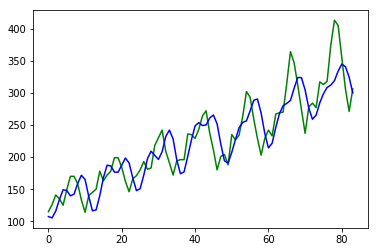

In [24]:
plt.plot(trainTrue, c = 'g')
plt.plot(trainPredict, c = 'b')
plt.show()

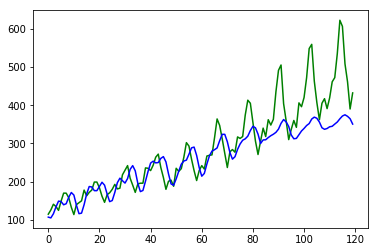

In [25]:
combinedPredicted = np.concatenate((trainPredict, testPredict))
combinedTrue = np.concatenate((trainTrue, testTrue))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()